In [1]:
# comment

#import the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## MARKDOWN CELL TO OTYPE YOUR ANALYSIS

<AxesSubplot:>

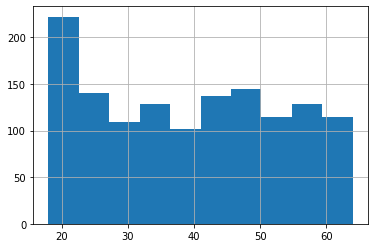

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_insurance['age'].hist()



In [13]:
df_insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


<AxesSubplot:>

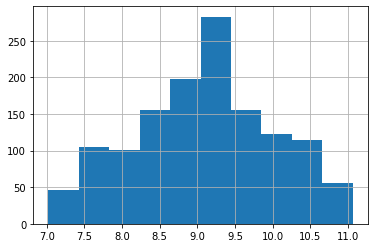

In [15]:
# TV to be normally dist
np.log(df_insurance['charges']).hist()

<AxesSubplot:>

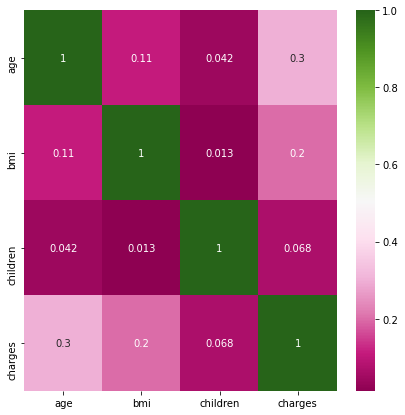

In [18]:
#multicoll = .corr()
plt.figure(figsize=(7,7))
sns.heatmap(df_insurance.corr(), annot = True, cmap='PiYG')


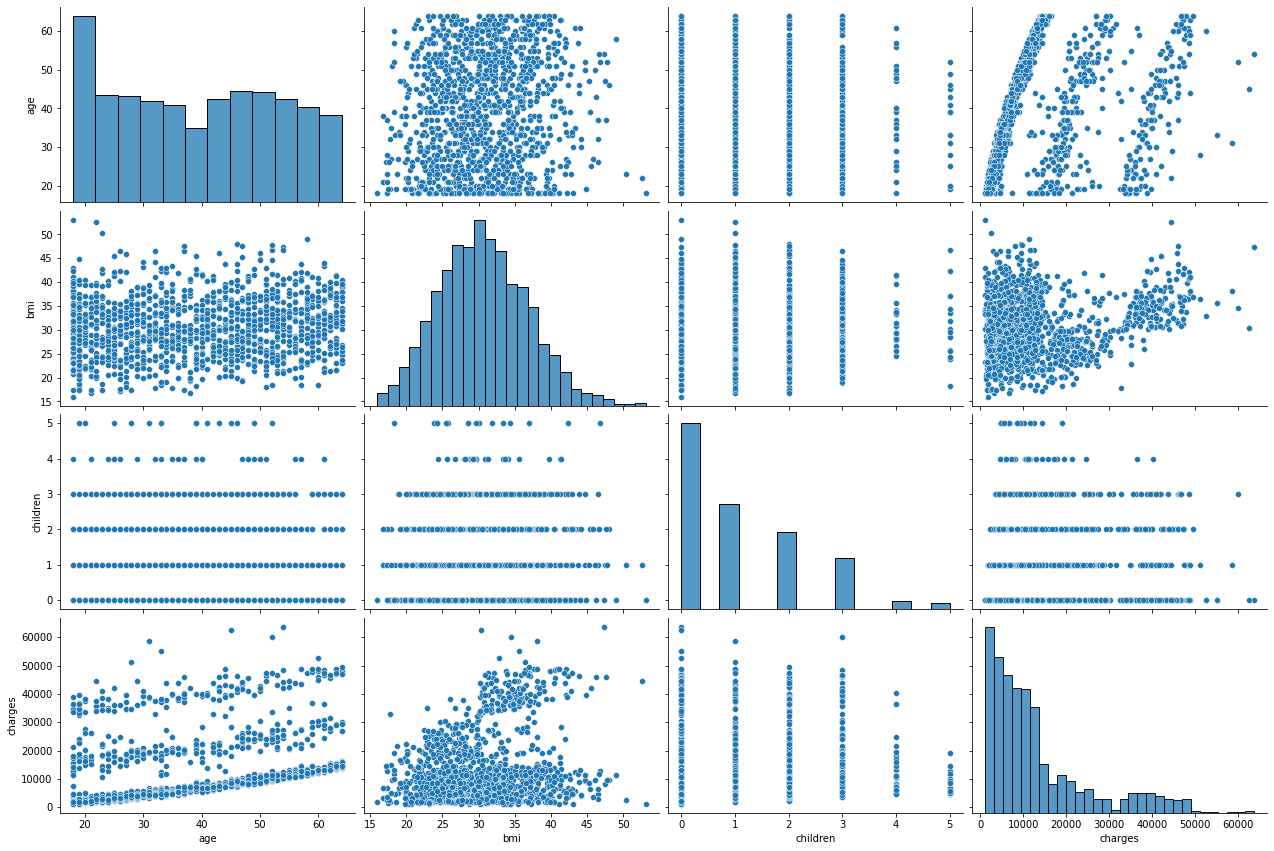

In [20]:
#linearity
#pair plot
sns.pairplot(df_insurance, height = 3, aspect = 1.5)


In [24]:
df_insurance['bmi2'] = df_insurance['bmi']**5

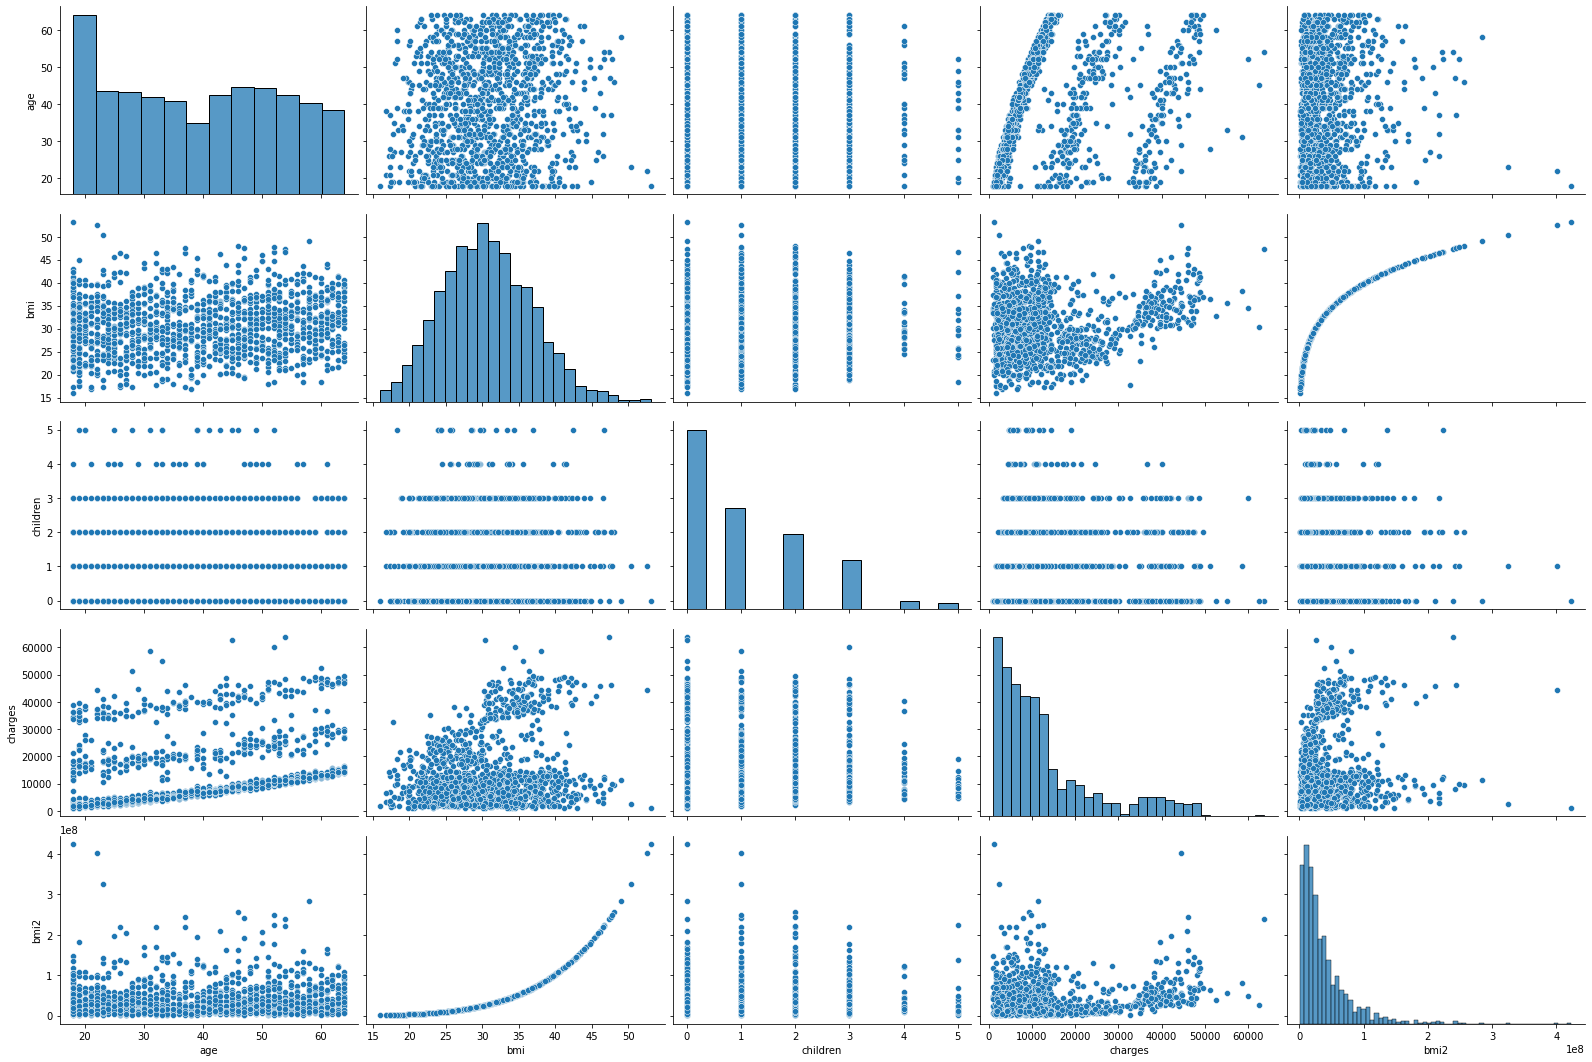

In [25]:
sns.pairplot(df_insurance, height = 3, aspect = 1.5)

In [27]:
df_insurance.drop('bmi2', inplace=True, axis=1)

In [29]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df_insurance = pd.get_dummies(df_insurance, columns=['sex','smoker','region'], drop_first=True)

In [32]:
df_insurance

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [34]:
X = df_insurance.loc[:,df_insurance.columns != 'charges']
y = df_insurance['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [36]:
from sklearn.preprocessing import StandardScaler #mean = 0 and SD = 1 
sc = StandardScaler()
sc.fit(X_train)                                                                                   # fit the data to Standardscaler

X_tests = sc.transform(X_test) 
X_trains = sc.transform(X_train)    # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(X_trains, columns=X_train.columns).head()) 


After standardizing our features, the first 5 rows of our data now look like this:

        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0  1.002286 -0.664745 -0.907058  -1.01887   -0.508747          1.769541   
1  1.002286 -1.514024 -0.078942   0.98148   -0.508747         -0.565118   
2 -1.504266  1.081177 -0.907058   0.98148   -0.508747         -0.565118   
3  1.503597 -1.083668 -0.907058  -1.01887   -0.508747          1.769541   
4  0.429360  0.494848 -0.078942   0.98148   -0.508747         -0.565118   

   region_southeast  region_southwest  
0         -0.598221         -0.575192  
1         -0.598221          1.738550  
2          1.671624         -0.575192  
3         -0.598221         -0.575192  
4         -0.598221          1.738550  


In [37]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
# import a class - knowhow

linreg = LinearRegression()
# create an object - actual computation

linreg.fit(X_trains,y_train) 
#training the model
#calculation of b0 and b1
# physical act of computing

y_pred_train = linreg.predict(X_trains)
y_pred_test = linreg.predict(X_tests) 
#predict

In [39]:
y_pred_test

array([ 4383.68089988, 12885.03892192, 12589.21653212, 13286.22919217,
         544.72832757, 32117.58400779, 12919.04237221, 12318.62183013,
        3784.29145555, 29468.45725408, 11002.8139431 , 17539.69473777,
        8681.35471964,  8349.04325528,  3130.12725504, 10445.83896118,
        3863.74357865,  6944.62510786, 15009.63121084, 14441.59911874,
       12543.65768867, 32958.72553095,  9072.63608136,  8986.85860053,
        3022.85773294,  8164.97136102,  9556.07558002, 10743.20363927,
        7694.01743692,  4373.43771674, 14140.93557984,  5811.78545062,
       34631.91316718, 27009.11191231, 33348.14098668,  9532.96786929,
       30421.65017927, 26648.91186842, 15157.78333287, 33895.76121465,
        6303.38552088, 14059.15156303, 10713.4467824 , 15089.36171493,
        4187.95334069, 13106.4297513 ,  4336.19603407, 28607.05556216,
        7243.57117377, 14269.4643165 , 13282.36924936, 12329.61280721,
        1851.87215658,  8876.2837892 , 26089.18341811, 10125.8221046 ,
      

In [40]:
y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64

In [41]:
from sklearn import metrics

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 6065.291120009164
RMSE for test set is 5956.454717976425
